## Importing Sklean and important Library

In [6]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

# Phase 0 : Data Import

## Importing bank-additional-full.csv file

In [4]:
bk = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

In [5]:
bk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Checking Missing Value

In [8]:
data=bk.dropna()
len(data)

41188

## Checking the Data Type

In [11]:
bk.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Phase 1: Exploratory Data Analysis

### Summary Statistics of Numerical Data 

In [36]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Box Plot Graph For Outlier Detection

In [13]:
import seaborn as sns
sns.set(style="whitegrid")

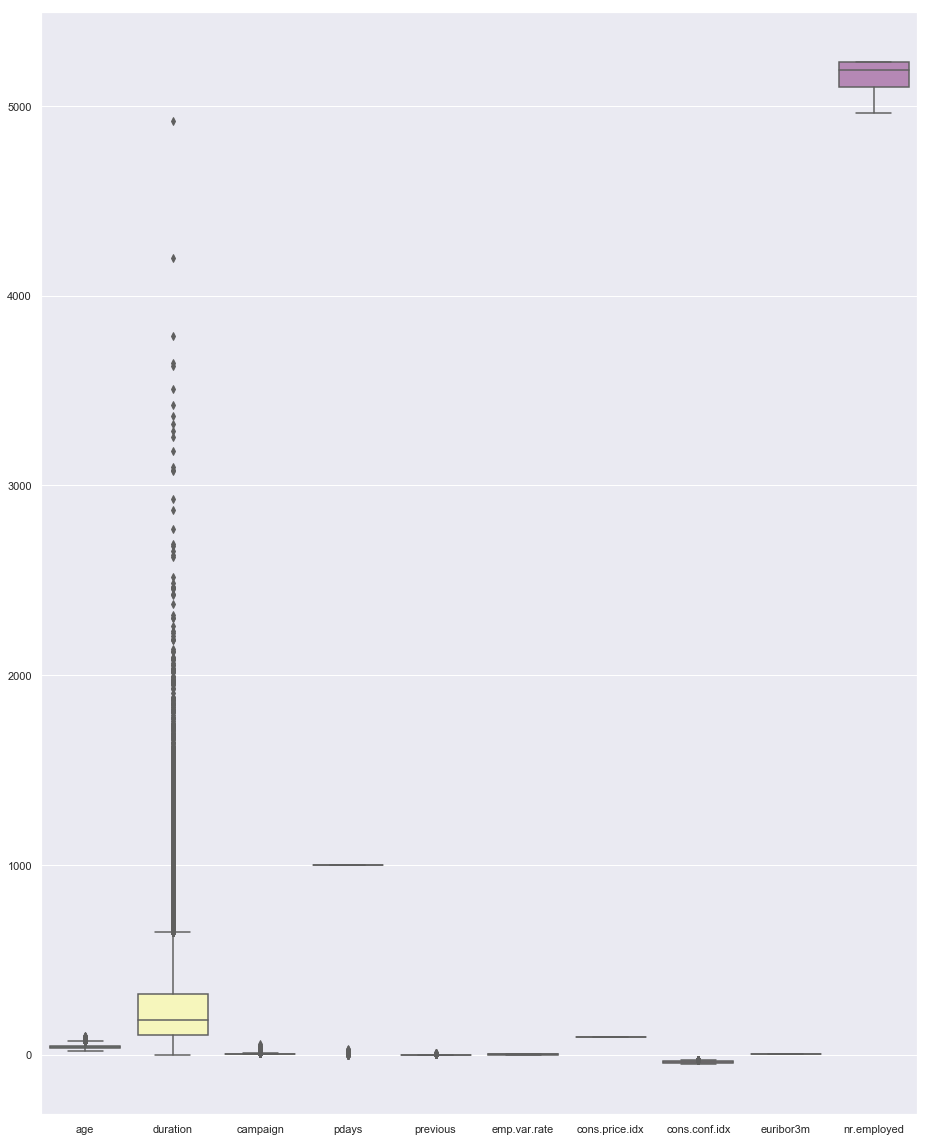

In [18]:
sns.set(rc={'figure.figsize':(15.7,20.27)})
ax = sns.boxplot(data=data[data.columns[0:20]], orient="o", palette="Set3")

### Frequency Distribution of Target Variable

In [19]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [21]:
perc_no = round((36548/41188)*100,4)
print('No % :',perc_no)
perc_yes = round((4640/41188)*100,4)
print('Yes % :',perc_yes)

No % : 88.7346
Yes % : 11.2654


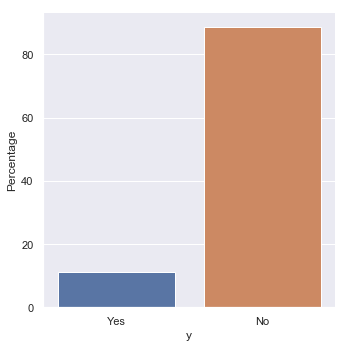

In [28]:
import seaborn as sns
df = pd.DataFrame({'y':['Yes', 'No'], 'Percentage':[11.2654, 88.7346]})
sns.catplot(x="y", y="Percentage", kind="bar", data=df);

### Summary Statistic of Numerical Data with respect to Two Classes i.e True and False of Target Variable

In [30]:
grouped_data = data.groupby(['y'])
grouped_data.mean().unstack() 

                y  
age             no       39.911185
                yes      40.913147
duration        no      220.844807
                yes     553.191164
campaign        no        2.633085
                yes       2.051724
pdays           no      984.113878
                yes     792.035560
previous        no        0.132374
                yes       0.492672
emp.var.rate    no        0.248875
                yes      -1.233448
cons.price.idx  no       93.603757
                yes      93.354386
cons.conf.idx   no      -40.593097
                yes     -39.789784
euribor3m       no        3.811491
                yes       2.123135
nr.employed     no     5176.166600
                yes    5095.115991
dtype: float64

# Phase 2 : Data Understanding

### Correlation Analysis

In [33]:
data_corr = data[data.columns[0:20]]
data_corr.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [13]:
bk.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [50]:
n_features = len(bk.job)
print(n_features)

41188


In [40]:
bk.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [68]:
y = data['y'].copy()
x = data.drop(['y'], axis=1)

In [70]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [71]:
categorical_column = x.select_dtypes(['object']).columns
print(categorical_column)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [72]:
x[categorical_column].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


### Convert the categorical data into numerical data using One-Hot Encoding

In [73]:
x_new= pd.get_dummies(x, columns=categorical_column)
x_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [74]:
x_new.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [75]:
x.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

In [76]:
x_new.apply(lambda x_new: len(x_new.unique()))

age                        78
duration                 1544
campaign                   42
pdays                      27
previous                    8
emp.var.rate               10
cons.price.idx             26
cons.conf.idx              26
euribor3m                 316
nr.employed                11
job_admin.                  2
job_blue-collar             2
job_entrepreneur            2
job_housemaid               2
job_management              2
job_retired                 2
job_self-employed           2
job_services                2
job_student                 2
job_technician              2
job_unemployed              2
job_unknown                 2
marital_divorced            2
marital_married             2
marital_single              2
marital_unknown             2
education_basic.4y          2
education_basic.6y          2
education_basic.9y          2
education_high.school       2
                         ... 
education_unknown           2
default_no                  2
default_un

In [78]:
x_new.shape

(41188, 63)

### Using Train Test Split 

In [95]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, y_train, y_test = train_test_split(x_new,y, test_size=0.2, random_state=45,stratify = y)

In [94]:
for df in[xx_train, xx_test, y_train, y_test]:
    print(df.shape)

(28831, 63)
(12357, 63)
(28831,)
(12357,)


# ExtraTreesClassifier 

In [109]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

clf = ExtraTreesClassifier(n_estimators = 100)
StratifiedKFold =StratifiedKFold(n_splits=10)
scores = cross_validate(clf, xx_train, y_train, cv=StratifiedKFold)
print('Average accuracy:',np.mean(scores['test_score']),"(+/-)",2*np.std(scores['test_score']))

md = clf.fit(xx_train, y_train) #fit method
print("Test Accuracy: %0.4f " % (metrics.accuracy_score(clf.predict(xx_test), y_test)))
print("\n")
y_pred = clf.predict(xx_test) #predict method
print("Kappa Statistic:")
print(cohen_kappa_score(y_test, y_pred))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print("\n")
print((classification_report(y_test, y_pred)))

Average accuracy: 0.9014569146898979 (+/-) 0.007058482226644975
Test Accuracy: 0.8988 


Kappa Statistic:
0.3937975905400374


Confusion Matrix:
[[7068  242]
 [ 592  336]]


Classification Report:


              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7310
         yes       0.58      0.36      0.45       928

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.75      0.66      0.70      8238
weighted avg       0.88      0.90      0.89      8238



In [110]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "%.0f"%(cm[i, j])
        print (t)
        plt.text(j, i, t,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
7068
242
592
336


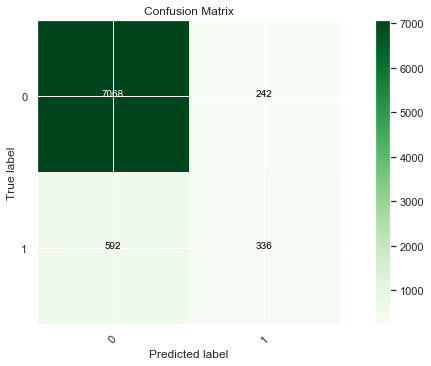

In [118]:
# Compute confusion matrix
y_pred = clf.predict(xx_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,5))

plot_confusion_matrix(cnf_matrix, classes=range(len(set( y_test))), normalize = False,
                      title='Confusion Matrix')

[ 1  0  8  2  3  9 62  5  7 37 39 10  6 23 32 29 57 24 56 58 59 19 55 40
  4 42 51 31 11 28 22 43 61 60 17 26 14 15 44 53 50 33 35 34 27 16 18 20
 45 12 49 54 13 48 52 46 38 41 21 47 25 30 36]
Feature ranking:
1. duration (0.213478)
2. age (0.072597)
3. euribor3m (0.069846)
4. campaign (0.054141)
5. pdays (0.044088)
6. nr.employed (0.039949)
7. poutcome_success (0.025805)
8. emp.var.rate (0.024778)
9. cons.conf.idx (0.018891)
10. housing_no (0.017069)
11. housing_yes (0.016881)
12. job_admin. (0.015078)
13. cons.price.idx (0.014718)
14. marital_married (0.014368)
15. education_university.degree (0.014353)
16. education_high.school (0.013869)
17. day_of_week_thu (0.013351)
18. marital_single (0.013009)
19. day_of_week_mon (0.012967)
20. day_of_week_tue (0.012958)
21. day_of_week_wed (0.012656)
22. job_technician (0.012430)
23. day_of_week_fri (0.012329)
24. loan_no (0.011532)
25. previous (0.011413)
26. loan_yes (0.011081)
27. month_may (0.010301)
28. education_professional.course (0.01

(0, 0.23292572751487722)

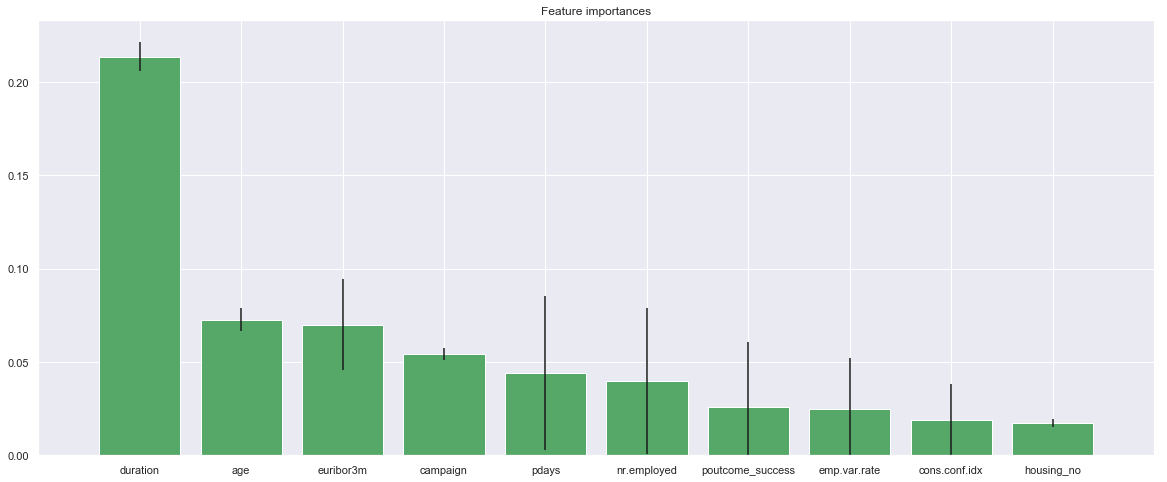

In [117]:
import matplotlib.pyplot as plt
n_features = len(x_new.columns)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(n_features):
    print("%d. %s (%f)" % (f + 1,  x_new.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="g", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(x_new.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(20,8)
axes = plt.gca()
axes.set_ylim([0,None])